In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=51961f3e0f128672f8faf799c708fa35


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | krasnyy chikoy
Processing Record 2 of Set 13 | tuktoyaktuk
Processing Record 3 of Set 13 | cayenne
Processing Record 4 of Set 13 | avarua
Processing Record 5 of Set 13 | klaksvik
Processing Record 6 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 13 | whitehorse
Processing Record 8 of Set 13 | mataura
Processing Record 9 of Set 13 | cape town
Processing Record 10 of Set 13 | dunedin
Processing Record 11 of Set 13 | saint george
Processing Record 12 of Set 13 | vila franca do campo
Processing Record 13 of Set 13 | georgetown
Processing Record 14 of Set 13 | jamestown
Processing Record 15 of Set 13 | contamana
Processing Record 16 of Set 13 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 13 | busselton
Processing Record 18 of Set 13 | tangzhai
Processing Record 19 of Set 13 | albany
Processing Record 20 of Set 13 | castro
Processing Record 21 of Set 13 | hermanus
Processing Record 22 of Set 13 | 

Processing Record 33 of Set 16 | saint-pierre
Processing Record 34 of Set 16 | yakeshi
Processing Record 35 of Set 16 | zubtsov
Processing Record 36 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 16 | bumba
Processing Record 38 of Set 16 | katsuura
Processing Record 39 of Set 16 | capao bonito
Processing Record 40 of Set 16 | ayan
Processing Record 41 of Set 16 | biltine
Processing Record 42 of Set 16 | una
Processing Record 43 of Set 16 | olga
Processing Record 44 of Set 16 | chalus
Processing Record 45 of Set 16 | celestun
Processing Record 46 of Set 16 | panjab
Processing Record 47 of Set 16 | irbil
Processing Record 48 of Set 16 | san juan
Processing Record 49 of Set 16 | rocha
Processing Record 50 of Set 16 | shenjiamen
Processing Record 1 of Set 17 | shingu
Processing Record 2 of Set 17 | bethel
Processing Record 3 of Set 17 | cururupu
Processing Record 4 of Set 17 | kefamenanu
Processing Record 5 of Set 17 | maguling
Processing Record 6 of Set 1

Processing Record 21 of Set 20 | sol-iletsk
Processing Record 22 of Set 20 | marienburg
Processing Record 23 of Set 20 | port keats
Processing Record 24 of Set 20 | bolungarvik
City not found. Skipping...
Processing Record 25 of Set 20 | chimbote
Processing Record 26 of Set 20 | beloha
Processing Record 27 of Set 20 | mayuge
Processing Record 28 of Set 20 | manaus
Processing Record 29 of Set 20 | grand gaube
Processing Record 30 of Set 20 | vaitupu
City not found. Skipping...
Processing Record 31 of Set 20 | verkhnyaya inta
Processing Record 32 of Set 20 | gualaquiza
Processing Record 33 of Set 20 | vestmanna
Processing Record 34 of Set 20 | tacuarembo
Processing Record 35 of Set 20 | chimala
Processing Record 36 of Set 20 | mouila
Processing Record 37 of Set 20 | bartica
Processing Record 38 of Set 20 | zaozerne
Processing Record 39 of Set 20 | betare oya
Processing Record 40 of Set 20 | hede
Processing Record 41 of Set 20 | puerto penasco
Processing Record 42 of Set 20 | kargasok
Pro

Processing Record 5 of Set 24 | vannes
Processing Record 6 of Set 24 | sorvag
City not found. Skipping...
Processing Record 7 of Set 24 | ostrovnoy
Processing Record 8 of Set 24 | tahoua
Processing Record 9 of Set 24 | koppal
Processing Record 10 of Set 24 | lipin bor
Processing Record 11 of Set 24 | forbes
Processing Record 12 of Set 24 | am timan
Processing Record 13 of Set 24 | comodoro rivadavia
Processing Record 14 of Set 24 | camacha
Processing Record 15 of Set 24 | port hedland
Processing Record 16 of Set 24 | savannah bight
Processing Record 17 of Set 24 | wanning
Processing Record 18 of Set 24 | pokrovsk
Processing Record 19 of Set 24 | tigre
Processing Record 20 of Set 24 | hermosillo
Processing Record 21 of Set 24 | dawei
Processing Record 22 of Set 24 | lorengau
Processing Record 23 of Set 24 | buraydah
Processing Record 24 of Set 24 | tateyama
Processing Record 25 of Set 24 | tucurui
Processing Record 26 of Set 24 | bukama
Processing Record 27 of Set 24 | ladario
Processin

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Krasnyy Chikoy,50.3643,108.7512,31.01,82,9,3.58,RU,2021-10-10 20:01:36
1,Tuktoyaktuk,69.4541,-133.0374,30.20,86,90,9.22,CA,2021-10-10 20:01:37
2,Cayenne,4.9333,-52.3333,87.84,76,0,5.01,GF,2021-10-10 20:01:37
3,Avarua,-21.2078,-159.7750,75.25,73,100,6.91,CK,2021-10-10 20:01:38
4,Klaksvik,62.2266,-6.5890,41.92,72,100,21.45,FO,2021-10-10 20:00:52
5,Whitehorse,60.7161,-135.0538,39.09,70,82,2.80,CA,2021-10-10 20:01:39
6,Mataura,-46.1927,168.8643,48.47,83,100,2.13,NZ,2021-10-10 20:02:01
7,Cape Town,-33.9258,18.4232,65.12,62,98,3.98,ZA,2021-10-10 20:00:51
8,Dunedin,-45.8742,170.5036,53.92,68,100,2.98,NZ,2021-10-10 20:02:01
9,Saint George,37.1041,-113.5841,71.44,33,0,1.99,US,2021-10-10 19:57:09


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Krasnyy Chikoy,RU,2021-10-10 20:01:36,50.3643,108.7512,31.01,82,9,3.58
1,Tuktoyaktuk,CA,2021-10-10 20:01:37,69.4541,-133.0374,30.20,86,90,9.22
2,Cayenne,GF,2021-10-10 20:01:37,4.9333,-52.3333,87.84,76,0,5.01
3,Avarua,CK,2021-10-10 20:01:38,-21.2078,-159.7750,75.25,73,100,6.91
4,Klaksvik,FO,2021-10-10 20:00:52,62.2266,-6.5890,41.92,72,100,21.45
5,Whitehorse,CA,2021-10-10 20:01:39,60.7161,-135.0538,39.09,70,82,2.80
6,Mataura,NZ,2021-10-10 20:02:01,-46.1927,168.8643,48.47,83,100,2.13
7,Cape Town,ZA,2021-10-10 20:00:51,-33.9258,18.4232,65.12,62,98,3.98
8,Dunedin,NZ,2021-10-10 20:02:01,-45.8742,170.5036,53.92,68,100,2.98
9,Saint George,US,2021-10-10 19:57:09,37.1041,-113.5841,71.44,33,0,1.99


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1633896425.032231

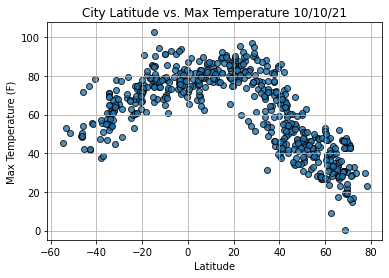

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

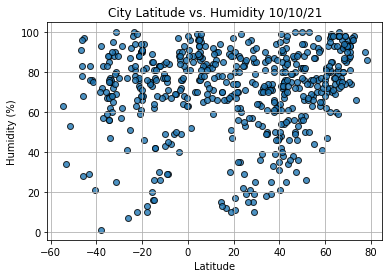

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

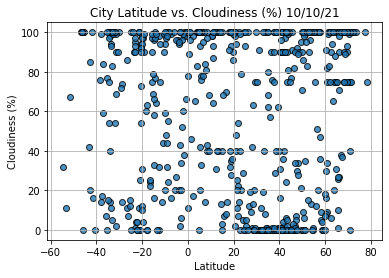

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

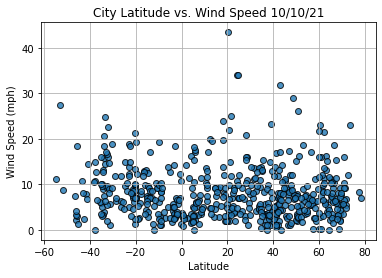

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

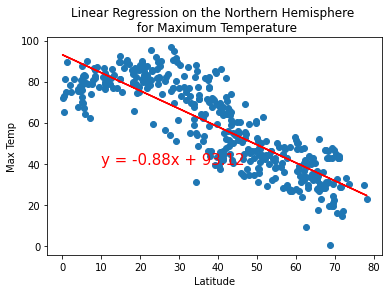

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

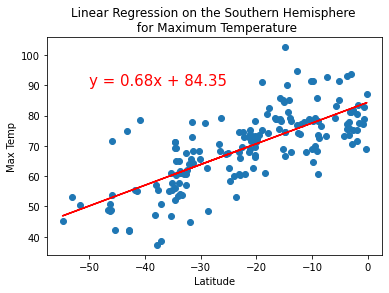

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

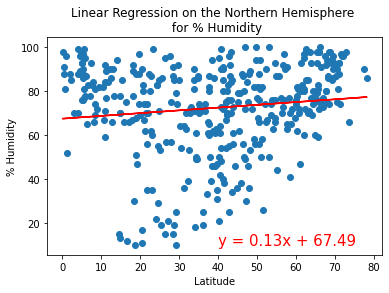

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

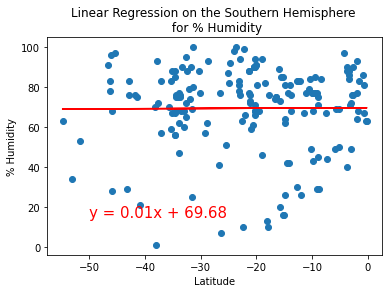

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

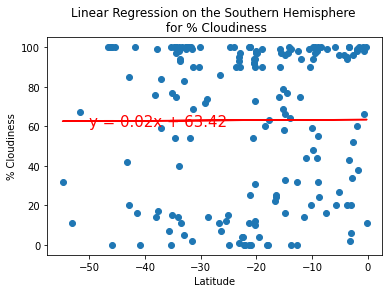

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

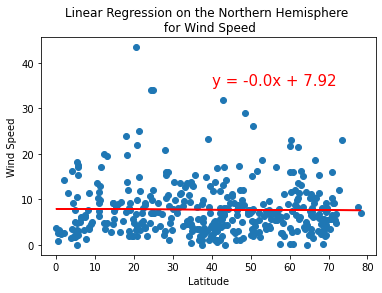

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

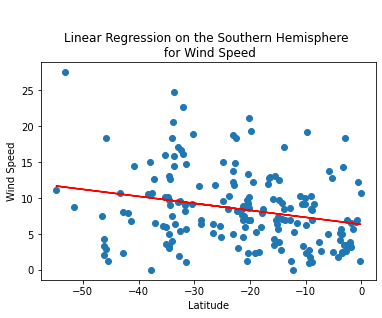

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))